In [1]:
import pandas as pd
import numpy as np

import cv2
import os
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

In [2]:
## Local'de bulunan zip dosyasının yüklenmesi
from google.colab import files
def getLocalFiles():
    _files = files.upload()
    if len(_files) >0:
       for k,v in _files.items():
         open(k,'wb').write(v)
getLocalFiles()

Saving archive.zip to archive.zip


In [25]:
## Yüklenen zip dosyasının unzip edilme işlemi
from zipfile import ZipFile

with ZipFile('archive.zip', 'r') as zipObj:
   zipObj.extractall()

In [75]:
def import_images(folder,target):
    images = []
    for item in os.listdir(folder):
        img = cv2.imread(os.path.join(folder,item),0)
        if img is not None:
            images.append([img,target])
    return images

In [27]:
bengin = import_images("Dataset_BUSI_with_GT/benign/",0)
malignant = import_images("Dataset_BUSI_with_GT/malignant/",1)
normal = import_images("Dataset_BUSI_with_GT/normal/",2)

In [28]:
## bengin ve malignant birleştirildi (newlist-> begin)
bengin.extend(malignant)

## bengin ve normal birleştirildi (newlist-> bengin)
bengin.extend(normal)

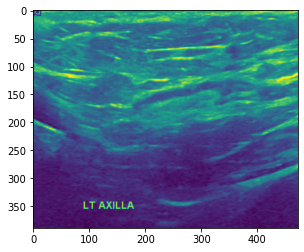

In [29]:
plt.imshow(bengin[600][0])

In [30]:
data = bengin

In [31]:
feature_matrix = []
label = []
for x,y in data:
    feature_matrix.append(x)
    label.append(y)

In [34]:
feature_matrix[2]

array([[202, 201,  39, ..., 170, 168, 164],
       [160, 207, 123, ..., 157, 153, 147],
       [ 93, 197, 180, ..., 141, 141, 142],
       ...,
       [ 27,  29,  31, ...,  23,  22,  22],
       [ 18,  20,  23, ...,  17,  17,  17],
       [ 16,  18,  20, ...,  15,  16,  18]], dtype=uint8)

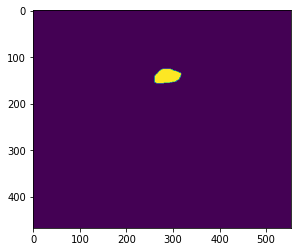

In [35]:
plt.imshow(feature_matrix[1])

In [36]:
label[1500]

2

In [37]:
## resized image
X=[]
img_size=128

for x in feature_matrix:
    new_array = cv2.resize(x,(img_size,img_size))
    X.append(new_array)

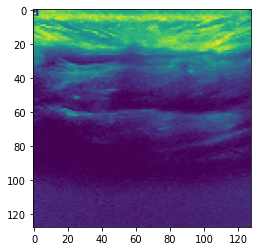

In [38]:
plt.imshow(X[222])

In [39]:
X_corrected = []
for image in X:
    image = image/255
    X_corrected.append(image)

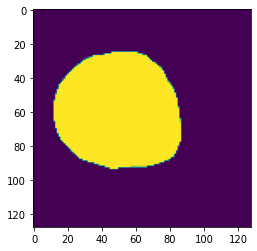

In [40]:
plt.imshow(X_corrected[213])

In [41]:
np.array(X_corrected).shape

(1578, 128, 128)

In [42]:
X_M = np.array(X_corrected)

In [43]:
X_M.shape

(1578, 128, 128)

In [44]:
X_M_R =X_M.reshape(X_M.shape[0],X_M.shape[1],X_M.shape[2],1)

In [45]:
X_M_R.shape

(1578, 128, 128, 1)

In [46]:
X_train,X_test,y_train,y_test = train_test_split(X_M_R,label)

In [47]:
X_train.shape

(1183, 128, 128, 1)

In [48]:
X_test.shape

(395, 128, 128, 1)

In [55]:
import sys
#from keras.utils import to_categorical
from tensorflow.keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Dense
from keras.layers import Flatten
#from keras.optimizers import SGD
from tensorflow.python.keras.optimizer_v1 import SGD
#from keras.optimizers import Adam
from tensorflow.keras.optimizers import Adam

In [56]:
def define_model():
    model = Sequential()
    model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(128, 128,1)))
    model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Flatten())
    model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
    model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
    model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
    model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
    model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
    model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
    model.add(Dense(3, activation='softmax'))
    # compile model
    opt = Adam(lr=0.001)
    model.compile(optimizer=opt, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

## sparse_categorical_crossentropy

In [ ]:
model =  define_model()
history = model.fit(np.array(X_train),np.array(y_train), epochs=30,validation_data=(X_test, np.array(y_test)))

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/30
37/37 [==============================] - 175s 5s/step - loss: 0.9070 - accuracy: 0.6061 - val_loss: 0.8847 - val_accuracy: 0.6329
Epoch 2/30
37/37 [==============================] - 173s 5s/step - loss: 0.7684 - accuracy: 0.6407 - val_loss: 0.7681 - val_accuracy: 0.6557
Epoch 3/30
37/37 [==============================] - 171s 5s/step - loss: 0.7025 - accuracy: 0.6602 - val_loss: 0.7186 - val_accuracy: 0.6658
Epoch 4/30
37/37 [==============================] - 172s 5s/step - loss: 0.6508 - accuracy: 0.7033 - val_loss: 0.9067 - val_accuracy: 0.5823
Epoch 5/30
37/37 [==============================] - 171s 5s/step - loss: 0.6796 - accuracy: 0.6796 - val_loss: 1.0370 - val_accuracy: 0.6025
Epoch 6/30
37/37 [==============================] - 171s 5s/step - loss: 0.6391 - accuracy: 0.7084 - val_loss: 0.6231 - val_accuracy: 0.7038
Epoch 7/30
37/37 [==============================] - 172s 5s/step - loss: 0.5287 - accuracy: 0.7430 - val_loss: 0.6292 - val_accuracy: 0.7241
Epoch 8/30
37

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


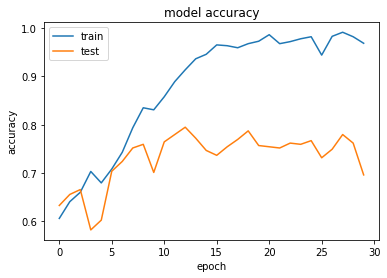

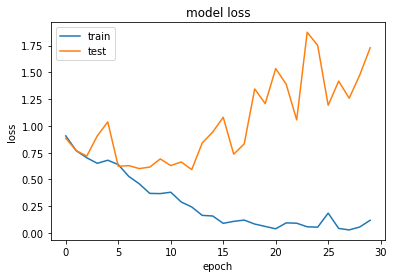

In [58]:
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [59]:
model.evaluate(np.array(X_test),np.array(y_test))

13/13 [==============================] - 12s 919ms/step - loss: 1.7293 - accuracy: 0.6962


[1.7292510271072388, 0.6962025165557861]

In [60]:
predicted = []
for item in model.predict(X_test):
    predicted.append(np.argmax(item))

In [62]:
X_test.shape

(395, 128, 128, 1)

In [66]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
conf = confusion_matrix(y_test,predicted)
conf

array([[157,  69,   1],
       [ 22,  71,   7],
       [  2,  19,  47]])

Text(0.5, 117.59999999999997, 'Predicted')

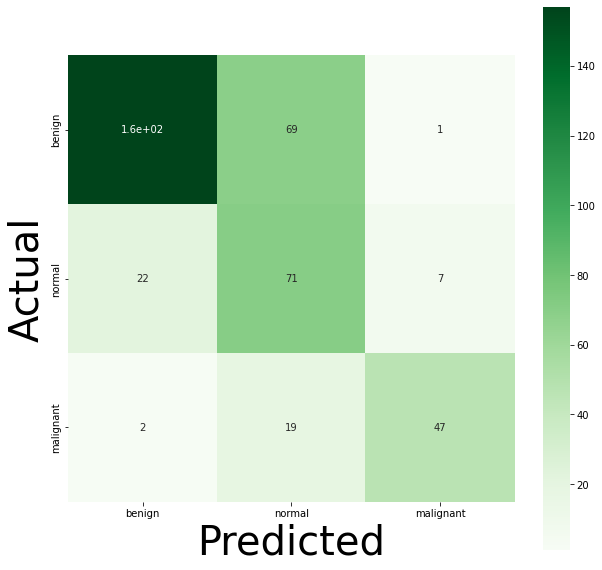

In [67]:
import seaborn as sns
info = [
    'benign'   ,  # 0
    'normal'   ,  # 1
    'malignant',  # 2
]
plt.figure(figsize = (10,10))
ax = sns.heatmap(conf, cmap=plt.cm.Greens, annot=True, square=True, xticklabels = info, yticklabels = info)
ax.set_ylabel('Actual', fontsize=40)
ax.set_xlabel('Predicted', fontsize=40)

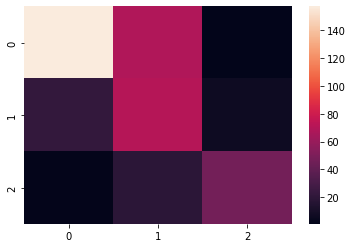

In [68]:
sns.heatmap(conf)

In [69]:
X_test.shape

(395, 128, 128, 1)

In [73]:
img = X_test[222]

In [78]:
#plt.imshow(img)

In [79]:
img1=img.reshape(1,X_M.shape[1],X_M.shape[2],1)

In [80]:
img1.shape

(1, 128, 128, 1)

In [81]:
np.argmax(model.predict(img1))

1

In [82]:
def image_prediction(img):
#     plt.imshow(img)
    img1=img.reshape(1,128,128,1)
    predict = np.argmax(model.predict(img1))
    if predict==0:
        print("YOU ARE IN NORMAL CONDITION NO NEED TO WORRY ABOUT")
    elif predict==1:
        print("Benign the cells are not yet cancerous, but they have the potential to become malignant consult the doctor")
    else:
        print("Malignant tumors are cancerous. The cells can grow and spread to other parts of the body.")
      

In [84]:
image_prediction(X_test[8])

YOU ARE IN NORMAL CONDITION NO NEED TO WORRY ABOUT


In [85]:
image_prediction(X_test[215])

YOU ARE IN NORMAL CONDITION NO NEED TO WORRY ABOUT


In [86]:
image_prediction(X_test[53])

Malignant tumors are cancerous. The cells can grow and spread to other parts of the body.


In [87]:
def new_prediction(img):
    
    IMG_SIZE = 128
    img_array = cv2.imread(img, cv2.IMREAD_GRAYSCALE)
    new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
    return new_array.reshape(1, IMG_SIZE, IMG_SIZE, 1)

In [88]:
model.save_weights('model.h5')
model.save('Cancer_CNN.model')

INFO:tensorflow:Assets written to: Cancer_CNN.model/assets


In [90]:
import cv2
import tensorflow as tf

CATEGORIES = ["Normal", "Benign", "Malignant"]
# def prepare(filepath):
#     IMG_SIZE = 128  # 50 in txt-based
#     img_array = cv2.imread(filepath, cv2.IMREAD_GRAYSCALE)
#     new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
#     return new_array.reshape(-1, IMG_SIZE, IMG_SIZE, 1)


model = tf.keras.models.load_model("Cancer_CNN.model")
#model1 = model.load_weights("./model.h5")
prediction = model.predict([new_prediction('Dataset_BUSI_with_GT/malignant/malignant (10).png')])
   
print(prediction)  # will be a list in a list.
print(CATEGORIES[int(prediction[0][0])])

[[0. 1. 0.]]
Normal


In [91]:
predict = np.argmax(prediction)

if predict==0:
    print("YOU ARE IN NORMAL CONDITION NO NEED TO WORRY ABOUT")
    
elif predict==1:
    print("Benign the cells are not yet cancerous, but they have the potential to become malignant consult the doctor")
else:
    print("Malignant the tumors are cancerous. The cells can grow and spread to other parts of the body.")

Benign the cells are not yet cancerous, but they have the potential to become malignant consult the doctor
